In [1]:
from radiomics import featureextractor
import pydicom
from pydicom.filereader import read_dicomdir
from pydicom.data import get_testdata_files
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manim
from skimage.measure import find_contours
from pylidc.utils import consensus
import math
from PIL import Image
import os

In [2]:
path = "C:/Users/35192/Desktop/LIDC-IDRI"
f = open('C:/Users/35192/pylidc.conf', 'w')
f.write(f'[dicom]\npath = {path}\n\n')
f.close()
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,
                                 pl.Scan.pixel_spacing <= 0.6)


Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
Loading dicom files ... This ma

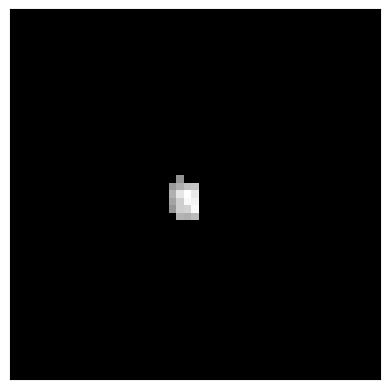

In [11]:
# Query for a scan, and convert it to an array volume.
import os
root="C:/Users/35192/Desktop/LIDC-IDRI"
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
for di in dirlist:
    scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == di).first()
    vol = scan.to_volume()
    nods = scan.cluster_annotations()
    for n in range(len(nods)):
        # Cluster the annotations for the scan, and grab one.
        anns = nods[n]
        # Perform a consensus consolidation and 50% agreement level.
        # We pad the slices to add context for viewing.
        cmask,cbbox,masks = consensus(anns, clevel=0.5,pad=[(20,20), (20,20), (0,0)])
        k = int(0.5*(cbbox[2].stop - cbbox[2].start))
        boolean_map = np.array(cmask[:,:,k])
        number_image = np.array(vol[cbbox][:,:,k])
        for i in range(len(boolean_map)):
            for d in range(len(boolean_map[0])):
                if(boolean_map[i][d]==False):
                    number_image[i][d]=-1000
        fig=plt.imshow(number_image,cmap=plt.cm.gray)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig(f'C:/Users/35192/Desktop/imagens/{di}-{n}.png')
    
